## Demo

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from skimage.io import imread
from skimage.transform import rescale,resize

In [2]:
with open("data/domestic-cat/dc (1).jpg","rb") as f:
    content = f.read()

content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [2]:
cat_image = imread("data/domestic-cat/dc (1).jpg")

In [3]:
type(cat_image)

numpy.ndarray

In [13]:
cat_image[0,0,:]

array([185, 188, 193], dtype=uint8)

In [29]:
red_channel = cat_image[:,:,0]

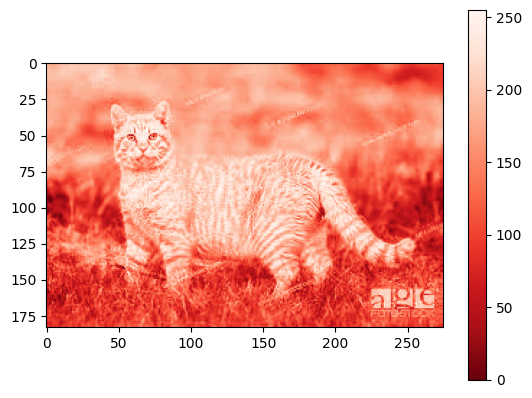

In [30]:
plt.imshow(red_channel,cmap="Reds_r")
plt.colorbar()

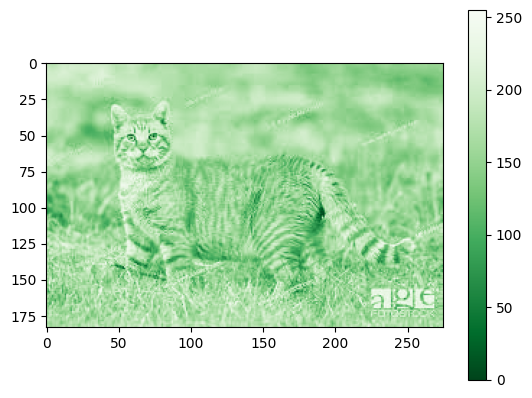

In [31]:
green_channel = cat_image[:,:,1]
plt.imshow(green_channel,cmap="Greens_r")
plt.colorbar()

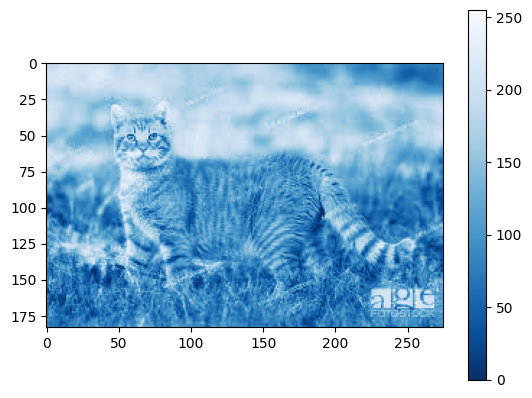

In [32]:
blue_channel = cat_image[:,:,2]
plt.imshow(blue_channel,cmap="Blues_r")
plt.colorbar()

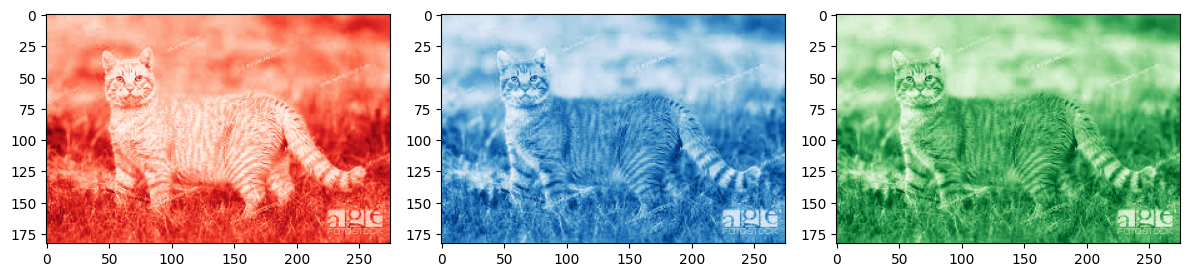

In [40]:
f,axes = plt.subplots(1,3,figsize=(12,10))

axes[0].imshow(red_channel,cmap="Reds_r")
axes[1].imshow(blue_channel,cmap="Blues_r") 
axes[2].imshow(blue_channel,cmap="Greens_r") 

plt.tight_layout()

<BarContainer object of 183 artists>

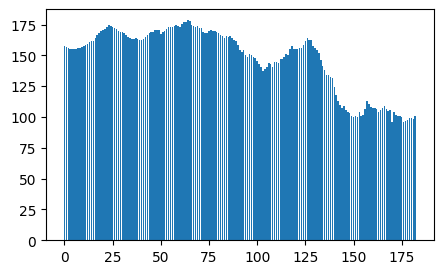

In [43]:
plt.figure(figsize=(5,3))
plt.bar(range(len(red_channel.mean(axis=1))),red_channel.mean(axis=1))


In [45]:
red_channel.std(ddof=1)

50.45514963045498

In [46]:
red_channel.mean()

147.5638350720318

In [47]:
red_channel.mean()/red_channel.std(ddof=1) #Signal to noise ratio

2.92465360132361

In [50]:
random_image = np.random.randint(0,255,(100,100))

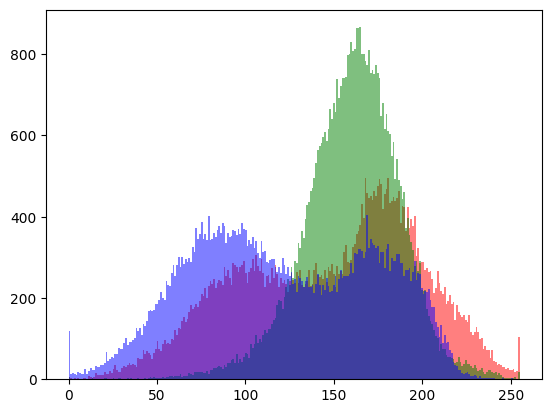

In [55]:
plt.hist(red_channel.ravel(),color="r",bins=256,alpha=0.5)
plt.hist(green_channel.ravel(),color="g",bins=256,alpha=0.5)
plt.hist(blue_channel.ravel(),color="b",bins=256,alpha=0.5)

plt.show()

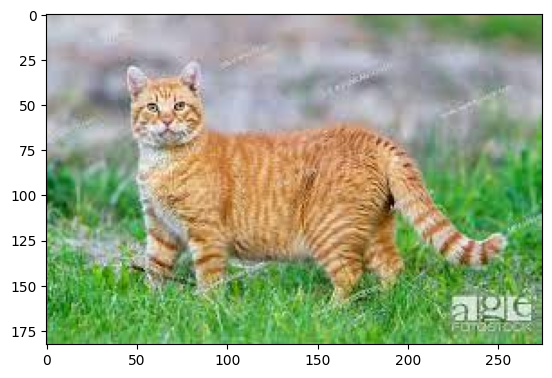

In [53]:
plt.imshow(cat_image)

In [56]:
r_copy = red_channel.copy()

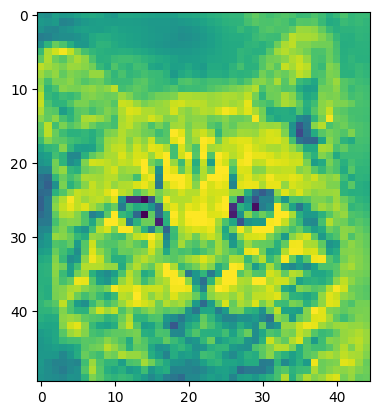

In [59]:
plt.imshow(r_copy[25:75,45:90])

In [60]:
r_copy[25:75,45:90] = 0

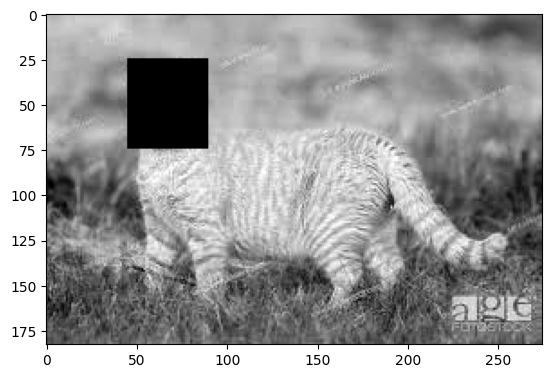

In [61]:
plt.imshow(r_copy,cmap="gray")

In [69]:
r_copy[r_copy<100] = 0
r_copy[r_copy>200] = 255

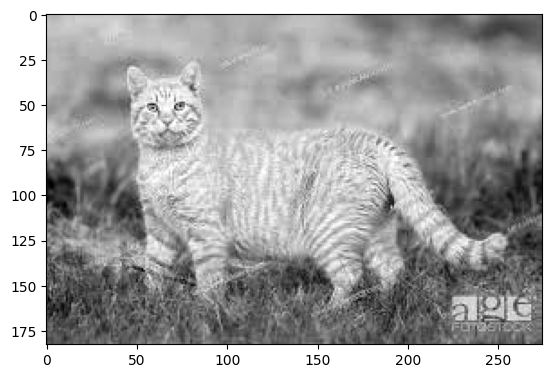

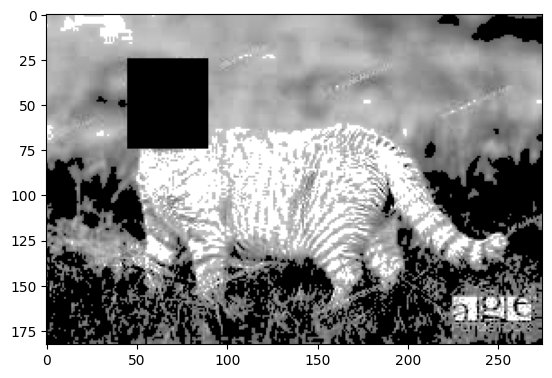

In [70]:
plt.imshow(red_channel,cmap="gray",vmin = 0,vmax = 255)
plt.show()
plt.imshow(r_copy,cmap="gray",vmin = 0,vmax = 255)
plt.show()

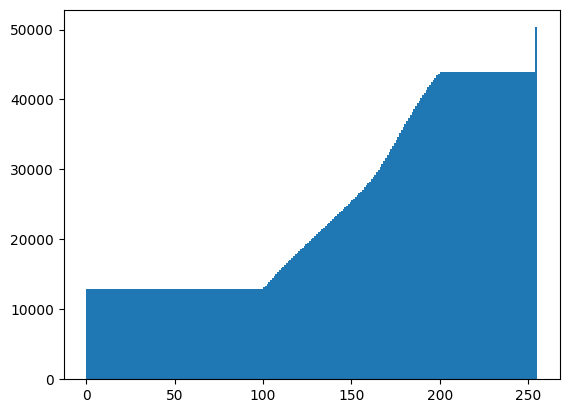

In [73]:
plt.hist(r_copy.ravel(),bins = 255,cumulative=True)
plt.show()

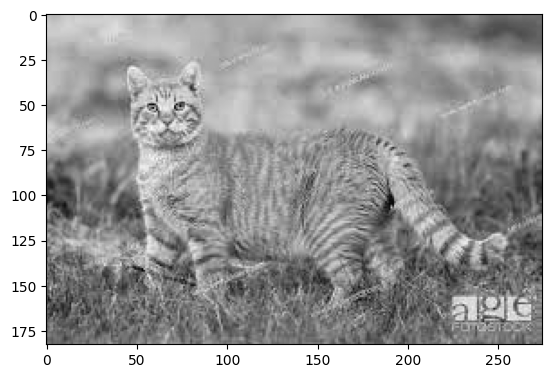

In [75]:
plt.imshow(cat_image.mean(axis=2),cmap="gray")

In [76]:
red_channel

array([[185, 183, 179, ..., 107, 104, 104],
       [186, 184, 181, ..., 103, 100, 100],
       [189, 187, 184, ...,  98,  96,  96],
       ...,
       [ 55,  75,  73, ..., 101,  98,  98],
       [ 68,  85,  80, ...,  87,  83,  83],
       [ 78,  93,  85, ...,  85,  80,  80]], dtype=uint8)

In [83]:
red_channel/255

array([[0.7254902 , 0.71764706, 0.70196078, ..., 0.41960784, 0.40784314,
        0.40784314],
       [0.72941176, 0.72156863, 0.70980392, ..., 0.40392157, 0.39215686,
        0.39215686],
       [0.74117647, 0.73333333, 0.72156863, ..., 0.38431373, 0.37647059,
        0.37647059],
       ...,
       [0.21568627, 0.29411765, 0.28627451, ..., 0.39607843, 0.38431373,
        0.38431373],
       [0.26666667, 0.33333333, 0.31372549, ..., 0.34117647, 0.3254902 ,
        0.3254902 ],
       [0.30588235, 0.36470588, 0.33333333, ..., 0.33333333, 0.31372549,
        0.31372549]])

In [87]:
normalized = (red_channel-red_channel.mean())/red_channel.std()

In [88]:
normalized.mean()

-1.8072423284111838e-17

In [89]:
normalized.std()

1.0

Now we can take the normalized version and make it more contrast by powering it to a number

C:\Users\mitko\AppData\Local\Temp\ipykernel_2012\2829014919.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.imshow(normalized **0.5,cmap="gray")


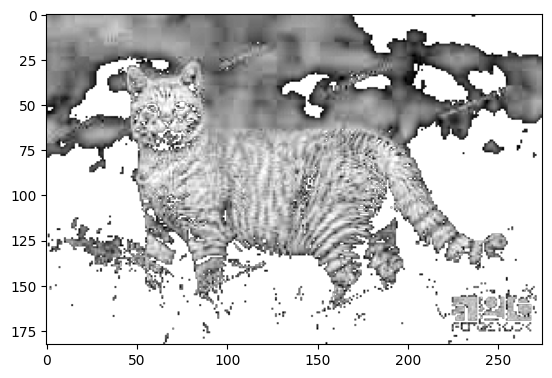

In [105]:
plt.imshow(normalized **0.5,cmap="gray")
plt.show()

We could also get a log to make the dark pictures lighter

C:\Users\mitko\AppData\Local\Temp\ipykernel_2012\1130351007.py:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(normalized + EPS),cmap ="gray")


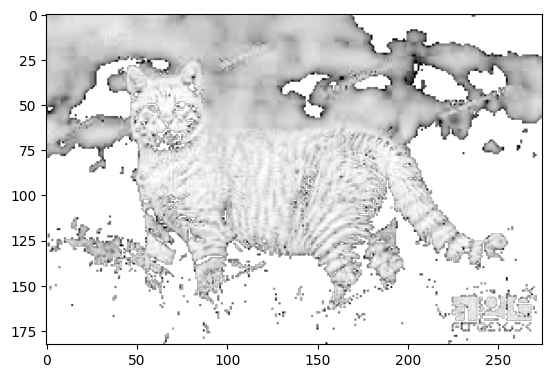

In [104]:
EPS = 1e-7
plt.imshow(np.log(normalized + EPS),cmap ="gray")

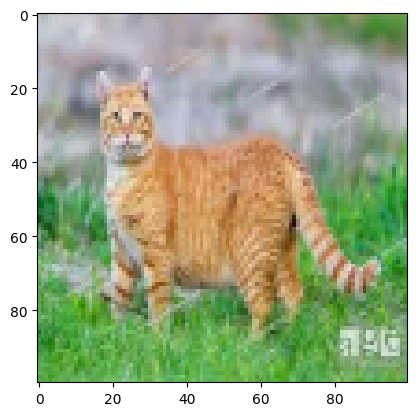

In [109]:
plt.imshow(resize(cat_image,(100,100)))

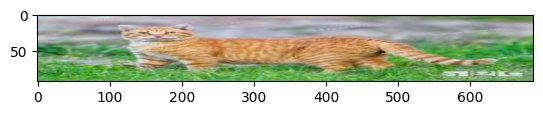

In [110]:
plt.imshow(rescale(cat_image,(0.5,2.5,1)))